In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['Species']=pd.Categorical.from_codes(iris.target,iris.target_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [4]:
# converting categorical Columns
df.replace({'Species':{'setosa':0,'versicolor':1,'virginica':2}}, inplace=True)
#df['Species'].value_counts(normalize=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


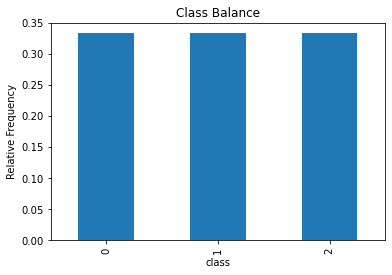

In [7]:
# Plot value counts of `"class-species"`
df["Species"].value_counts(normalize=True).plot(
kind="bar", xlabel="class", ylabel="Relative Frequency",title="Class Balance");


In [8]:
df['Species'].value_counts(normalize=True)


0    0.333333
1    0.333333
2    0.333333
Name: Species, dtype: float64

In [9]:
target = "Species"
X = df.drop(columns=target)
y = df[target]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size=0.1, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (135, 4)
y_train shape: (135,)
X_test shape: (15, 4)
y_test shape: (15,)


In [14]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.35


In [15]:
# Build model
model=make_pipeline(
    LogisticRegression(max_iter=1000)
    
    )
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=1000))])

In [18]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.98
Test Accuracy: 1.0


In [19]:
model.predict(X_train)[:5]

array([1, 2, 1, 1, 2])

In [37]:
# Create empty lists for training and testing accuracy scores
training_acc = []
testing_acc = []
iters=range(100,1000,100)

for i in iters:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        LogisticRegression(max_iter=i))
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate testing accuracy score and append to `testing_acc`
    testing_acc.append(test_model.score(X_test,y_test))

print("Training Accuracy Scores:", training_acc[:3])
print("testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
testing Accuracy Scores: [1.0, 1.0, 1.0]


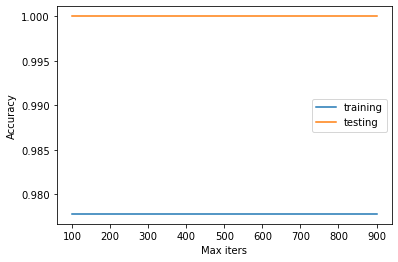

In [38]:
# Plot `max_iters`, `training_acc`
plt.plot(iters,training_acc,label="training")
plt.plot(iters,testing_acc,label="testing")
plt.xlabel("Max iters")
plt.ylabel("Accuracy")
plt.legend();

In [34]:
test_acc = model.score(X_test,y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 1.0
